In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Car details v3.csv')
train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [12]:
train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [18]:
train['seats']=train['seats'].fillna(train['seats'].median())
train= train.fillna(0)

In [19]:
train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [20]:
train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder
laben =LabelEncoder()
train['fuel']=laben.fit_transform(train['fuel'])

In [28]:
train=pd.get_dummies(train)

C:\Users\SEETHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='count'>

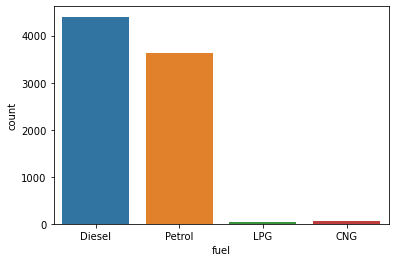

In [6]:
plt.figure()
sns.countplot(train['fuel'])

C:\Users\SEETHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='owner', ylabel='count'>

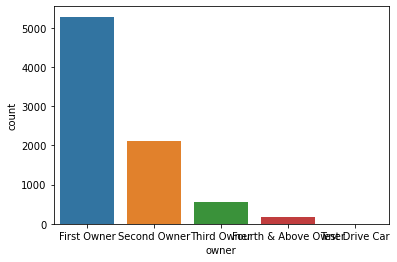

In [7]:
sns.countplot(train['owner'])

<AxesSubplot:xlabel='fuel', ylabel='count'>

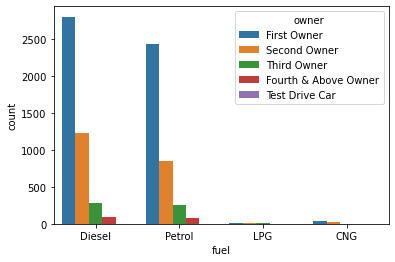

In [8]:
sns.countplot(x ='fuel', hue='owner', data=train)

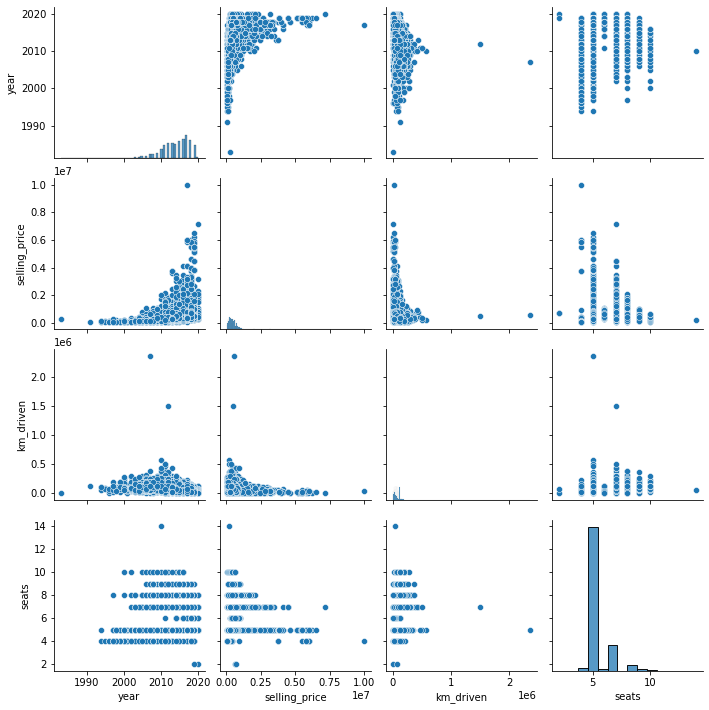

In [9]:
sns.pairplot(train)

<AxesSubplot:xlabel='fuel', ylabel='year'>

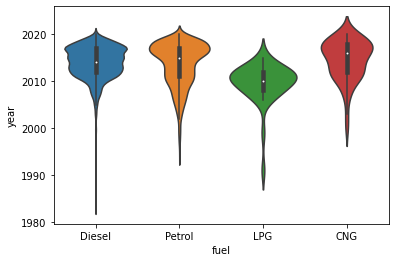

In [11]:
sns.violinplot(x='fuel',y='year',data=train)

In [32]:
x=train.drop(['selling_price'],axis=1)
y=pd.DataFrame(train['selling_price'])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

5308904377320799.0
1471775267990262.8
809572287645531.5
456216892262569.25
282932464164357.9
213620902963110.75
169654036128985.56
136107066015087.61
118678344302367.73
102379353785196.42


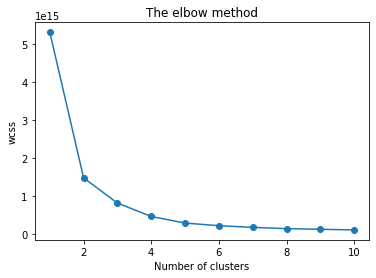

In [35]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss,'-o')
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [37]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(train)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors=np.arange(3,15)
for K in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=K,metric='minkowski')
    classifier.fit(x_train,y_train)
    predictions= classifier.predict(x_test)
    acc=accuracy_score(y_test,predictions)
    acc_values.append(acc)

C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [39]:
acc_values

[0.13038130381303814,
 0.11726117261172611,
 0.1111111111111111,
 0.10619106191061911,
 0.10414104141041411,
 0.1025010250102501,
 0.10414104141041411,
 0.1025010250102501,
 0.1016810168101681,
 0.1025010250102501,
 0.1025010250102501,
 0.1045510455104551]

Text(0, 0.5, 'accuracy')

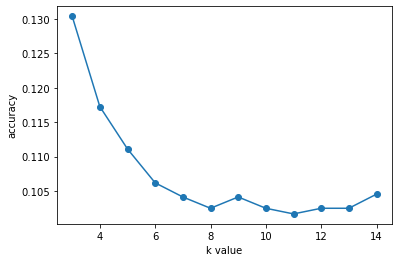

In [40]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [41]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_test)

C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
